In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# these don't change

N = 2
M = 5
V = -1
dt = 0.01

In [3]:
# example simulation 
total_time = 10

total_steps = int(total_time / dt)
times = np.linspace(0, total_time, total_steps)
mu_V_ratio_routine = np.linspace(10, 0, total_steps)
J_V_ratio_routine = np.linspace(0.1, 2, total_steps)

adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
    simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)

Text(0, 0.5, 'Energy [$E/|V|$]')

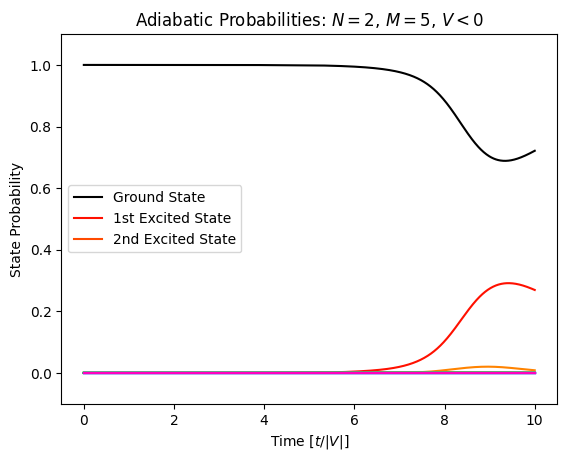

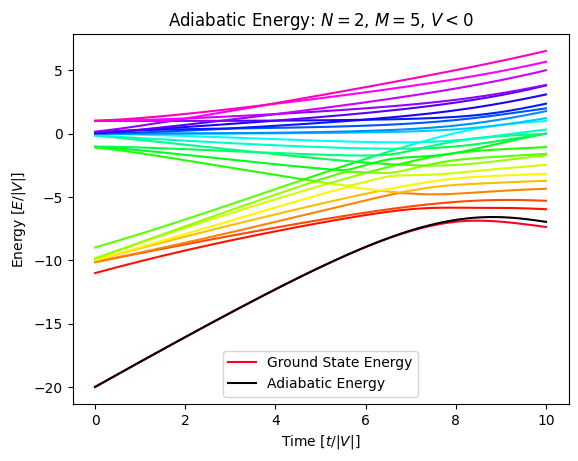

In [4]:
# example plotting
colors = get_cmap("gist_rainbow", M**N)

fig, ax = plt.subplots()
for index in range(M**N):
    if index == 0:
        ax.plot(times, adiabatic_probabilities[:,index], color = "k", label = "Ground State")
    elif index == 1:
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index), label = "1st Excited State")
    elif index == 2:
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index), label = "2nd Excited State") 
    else: 
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index))
ax.set_ylim(-0.1,1.1)
ax.legend(loc = "center left")
ax.set_title(f"Adiabatic Probabilities: $N={N}$, $M={M}$, $V<0$")
ax.set_xlabel("Time [$t/|V|$]")
ax.set_ylabel("State Probability")

fig, ax = plt.subplots()
for index in range(M**N):
    if index == 0:
        ax.plot(times, true_energies[:,index], color = colors(index), label = "Ground State Energy")
    else:
        ax.plot(times, true_energies[:,index], color = colors(index))
ax.plot(times, adiabatic_energies, color = "k", label = "Adiabatic Energy")
ax.legend(loc = "lower center")
ax.set_title(f"Adiabatic Energy: $N={N}$, $M={M}$, $V<0$")
ax.set_xlabel("Time [$t/|V|$]")
ax.set_ylabel("Energy [$E/|V|$]")